### Loading json data

In [1]:
from bokeh.io import push_notebook, output_notebook, output_file, show
from bokeh.charts import Bar, output_file, show
from bokeh.charts.attributes import CatAttr
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [2]:
import pandas as pd
import json
with open('data_analysis.json') as f:
    data = json.load(f) 

In [3]:
for k, v in data[100].items():
    print k, v, type(v)

city TOWSON <type 'unicode'>
name Modern Prestige Real Estate <type 'unicode'>
zip 21204 <type 'unicode'>
revenue $2.5 to 5 Million <type 'unicode'>
category_code 44400000 <type 'unicode'>
phone None <type 'NoneType'>
state MD <type 'unicode'>
address 7601 YORK RD <type 'unicode'>
headcount 20 to 49 <type 'unicode'>
time_in_business 10+ years <type 'unicode'>


In [5]:
size = len(data)

In [6]:
fields = data[0].keys()
print len(fields), fields

10 [u'city', u'name', u'zip', u'revenue', u'category_code', u'phone', u'state', u'address', u'headcount', u'time_in_business']


## I. Fill rate

In [7]:
from collections import Counter

In [8]:
def fill_rate(field):
    no_str_vals = []
    for row in data:
        if type(row[field]) != unicode:
            no_str_vals.append(row[field])
    return no_str_vals

In [9]:
fill_rate_dict = {}

for field in fields:
    print field, Counter( fill_rate(field))
    fill_rate_dict[field] = size - len(fill_rate(field))

print '\nFill rate:', fill_rate_dict

city Counter({0: 17, None: 14})
name Counter({None: 14, 0: 11})
zip Counter({0: 14, None: 12})
revenue Counter({None: 56908, 0: 15})
category_code Counter({None: 14, 0: 13})
phone Counter({None: 409111, 0: 18})
state Counter({None: 14, 0: 11})
address Counter({None: 14, 0: 13})
headcount Counter({None: 37648, 0: 10})
time_in_business Counter({None: 83875, 0: 7})

Fill rate: {u'city': 999969, u'name': 999975, u'zip': 999974, u'category_code': 999973, u'revenue': 943077, u'phone': 590871, u'state': 999975, u'address': 999973, u'headcount': 962342, u'time_in_business': 916118}


## II. Analysis of Each Field

In [10]:
def true_fill_rate(field, black_list):
    invalid_vals = []
    valid_vals = []
    
    for row in data:
        if type(row[field]) != unicode or row[field] in black_list:
            invalid_vals.append(row[field])
        else:
            valid_vals.append(row[field])
            
    return invalid_vals, valid_vals

### II.1. Analysis of Revenue

In [11]:
Counter ( [row['revenue'] for row in data] )

Counter({None: 56908,
         0: 15,
         u'': 11,
         u' ': 16,
         u'$1 to 2.5 Million': 169540,
         u'$10 to 20 Million': 48454,
         u'$100 to 500 Million': 10130,
         u'$2.5 to 5 Million': 99245,
         u'$20 to 50 Million': 32797,
         u'$5 to 10 Million': 83924,
         u'$50 to 100 Million': 12765,
         u'$500,000 to $1 Million': 153163,
         u'0': 15,
         u'Less Than $500,000': 329635,
         u'Over $1 Billion': 1769,
         u'Over $500 Million': 1579,
         u'none': 15,
         u'null': 19})

In [12]:
revenue_black_list = [None, 0, '', ' ', '0', 'none', 'null']

In [13]:
rev_invalid_vals, rev_valid_vals = true_fill_rate('revenue', revenue_black_list)

In [14]:
true_fill_rate_dict = {}
unique_vals = {}

In [15]:
true_fill_rate_dict['revenue'] = len(rev_valid_vals)

print '\nTrue-valued fill rate for the Revenue field is {} (over {} data point, which is {}%), \
compared to the fill rate of {}'.\
format(len(rev_valid_vals), size, len(rev_valid_vals)*100.0/size, fill_rate_dict['revenue'])


True-valued fill rate for the Revenue field is 943001 (over 1000000 data point, which is 94.3001%), compared to the fill rate of 943077


In [16]:
unique_vals['revenue'] = len(set(rev_valid_vals))
print 'The total number of unique values in Revenue field is', unique_vals['revenue']

The total number of unique values in Revenue field is 11


In [17]:
rev = pd.DataFrame.from_dict(Counter(rev_valid_vals), orient='index').reset_index()
rev.columns = ['revenue', 'counts']
rev = rev.sort_values('counts', ascending = False)

In [18]:
rev.index = [0, 2, 1, 3, 4, 5, 6, 7, 8, 10, 9]
rev.sort_index(inplace= True)

In [273]:
rev.T

,0,1,2,3,4,5,6,7,8,9,10
revenue,"Less Than $500,000","$500,000 to $1 Million",$1 to 2.5 Million,$2.5 to 5 Million,$5 to 10 Million,$10 to 20 Million,$20 to 50 Million,$50 to 100 Million,$100 to 500 Million,Over $500 Million,Over $1 Billion
counts,329635,153163,169540,99245,83924,48454,32797,12765,10130,1579,1769


In [172]:
print 'Percent of business counts with less than 1 million $:', \
round((rev.counts[0]+rev.counts[1])*100.0/rev.counts.sum(),3), '%'

Percent of business counts with less than 1 million $: 51.198 %


In [271]:
p = Bar(rev,  values ='counts', 
        label=CatAttr(columns=['revenue'], sort=False),
        title="Counts of Businesses by Revenue Range", 
        plot_width=600, plot_height=360, color='#ff7f0e')
p.ygrid.grid_line_color = None
p.yaxis.minor_tick_line_color = None
p.xaxis.axis_label = None
p.yaxis.axis_label = "Counts"
p.legend.location = None
show(p)

### II.2. Analysis of Headcount

In [21]:
#Counter ( [row['headcount'] for row in data] )

In [22]:
headcount_check = [None, 0, '', ' ', '0', 'none', 'null']

In [23]:
head_invalid_vals, head_valid_vals = true_fill_rate('headcount', headcount_check)

In [24]:
true_fill_rate_dict['headcount'] = len(head_valid_vals)

print '\nTrue fill rate for the Headcount field is {} (over {} data point, which is {}%), \
compared to the fill rate of {}'.\
format(len(head_valid_vals), size, len(head_valid_vals)*100.0/size, fill_rate_dict['headcount'])


True fill rate for the Headcount field is 962273 (over 1000000 data point, which is 96.2273%), compared to the fill rate of 962342


In [25]:
unique_vals['headcount'] = len(set(head_valid_vals))
print 'The total number of unique values in Headcount field is', unique_vals['headcount']

The total number of unique values in Headcount field is 9


In [26]:
head = pd.DataFrame.from_dict(Counter(head_valid_vals), orient='index').reset_index()
head.columns = ['headcount', 'counts']
head = head.sort_values('counts', ascending = False)

In [27]:
head.index = [0, 1, 2, 3, 4, 5, 6, 8,7]
head.sort_index(inplace= True)

In [176]:
head.T

,0,1,2,3,4,5,6,7,8
headcount,1 to 4,5 to 9,10 to 19,20 to 49,50 to 99,100 to 249,250 to 499,500 to 999,"Over 1,000"
counts,358207,212401,151412,121264,60526,36475,11138,5250,5600


In [181]:
(head.counts[0]+head.counts[1])*100.0/head.counts.sum()

59.297933122928733

In [274]:
p = Bar(head,  values ='counts', 
        label=CatAttr(columns=['headcount'], sort=False),
        title="Counts of Businesses by Employee Numbers (HeadCount)", 
        plot_width=600, plot_height=330, color = '#2ca02c')
p.ygrid.grid_line_color = None
p.yaxis.minor_tick_line_color = None
p.xaxis.axis_label = None
p.yaxis.axis_label = "Counts"
p.legend.location = None
show(p)

### II.3. Analysis of Time_in_Business

In [29]:
Counter ( [row['time_in_business'] for row in data] )

Counter({None: 83875,
         0: 7,
         u'': 11,
         u' ': 13,
         u'0': 15,
         u'1-2 years': 12756,
         u'10+ years': 758867,
         u'3-5 years': 38280,
         u'6-10 years': 106144,
         u'Less than a year': 1,
         u'none': 14,
         u'null': 17})

In [30]:
tib_check = [None, 0, '', ' ', '0', 'none', 'null']

In [31]:
tib_invalid_vals, tib_valid_vals = true_fill_rate('time_in_business', tib_check)

In [32]:
true_fill_rate_dict['time_in_business'] = len( tib_valid_vals )

print '\nTrue-valued fill rate for the Time_in_Business field is {} (over {} data point, which is {}%), \
compared to the fill rate of {}'.\
format(len( tib_valid_vals ), size, len( tib_valid_vals )*100.0/size, fill_rate_dict['time_in_business'])


True-valued fill rate for the Time_in_Business field is 916048 (over 1000000 data point, which is 91.6048%), compared to the fill rate of 916118


In [33]:
unique_vals['time_in_business'] = len(set(tib_valid_vals))
print 'The total number of unique values in Time_in_Business field is', unique_vals['time_in_business']

The total number of unique values in Time_in_Business field is 5


In [34]:
tib = pd.DataFrame.from_dict(Counter(tib_valid_vals), orient='index').reset_index()
tib.columns = ['time_in_business', 'counts']
tib = tib.sort_values('counts', ascending = True)

In [178]:
tib

,time_in_business,counts
0,Less than a year,1
2,1-2 years,12756
1,3-5 years,38280
3,6-10 years,106144
4,10+ years,758867


In [180]:
tib.counts[4]*100.0/tib.counts.sum()

82.841401323948091

In [276]:
p = Bar(tib,  values ='counts', 
        label=CatAttr(columns=['time_in_business'], sort=False),
        title="Counts of Businesses by Time_in_Business", 
        plot_width=600, plot_height=350, color = 'red')
p.ygrid.grid_line_color = None
p.yaxis.minor_tick_line_color = None
p.xaxis.axis_label = None
p.yaxis.axis_label = "Counts"
p.legend.location = None
show(p)

### II.4. Analysis of Category Code

In [37]:
#Counter ( [row['category_code'] for row in data] ) 

In [38]:
catcode_check = [None, 0, '', ' ', '0', 'none', 'null']

In [39]:
catcode_invalid_vals, catcode_valid_vals = true_fill_rate('category_code', catcode_check)

In [40]:
true_fill_rate_dict['category_code'] = len(catcode_valid_vals)

print '\nTrue fill rate for the Category Code field is {} (over {} data point, which is {}%), \
compared to the fill rate of {}'.\
format(len(catcode_valid_vals), size, len(catcode_valid_vals)*100.0/size, fill_rate_dict['category_code'])


True fill rate for the Category Code field is 999910 (over 1000000 data point, which is 99.991%), compared to the fill rate of 999973


In [41]:
unique_vals['category_code'] = len(set(catcode_valid_vals))
print 'The total number of unique category codes is', len(set(catcode_valid_vals))

The total number of unique category codes is 1178


In [42]:
catcode = pd.DataFrame.from_dict(Counter(catcode_valid_vals), orient='index').reset_index()
catcode.columns = ['category_code', 'counts']
catcode = catcode.sort_values('counts', ascending = False)

In [229]:
catcode.counts[:3].sum()*100.0/catcode.counts.sum()

10.993889450050505

The most popular code belongs to the '**Elementary and Secondary Schools**', followed by the '**Offices of Lawyers**' and '**Offices of Real Estate Agents and Brokers**' categories

In [278]:
p = Bar(catcode[:20],  values ='counts', 
        label=CatAttr(columns=['category_code'], sort=False),
        title="Category Codes with Most Counts of Businesses from the Data Set", 
        plot_width=600, plot_height=330, color = '#d62728')
p.ygrid.grid_line_color = None
p.yaxis.minor_tick_line_color = None
p.xaxis.axis_label = "Category Codes"
p.yaxis.axis_label = "Counts"
p.legend.location = None
show(p)

### II.5. Analysis of State Field

In [45]:
#Counter ( [row['state'] for row in data] ) 

In [46]:
state_check = [None, 0, '', ' ', '0', 'none', 'null']

In [47]:
state_invalid_vals, state_valid_vals = true_fill_rate('state', state_check)

In [48]:
true_fill_rate_dict['state'] = len(state_valid_vals)

print '\nTrue fill rate for the State field is {} (over {} data point, which is {}%), \
compared to the fill rate of {}'.\
format(len(state_valid_vals), size, len(state_valid_vals)*100.0/size, fill_rate_dict['state'])


True fill rate for the State field is 999896 (over 1000000 data point, which is 99.9896%), compared to the fill rate of 999975


In [49]:
unique_vals['state'] = len(set(state_valid_vals)) 

print 'The total number of unique State codes is', unique_vals['state']

The total number of unique State codes is 53


In [50]:
state = pd.DataFrame.from_dict(Counter(state_valid_vals), orient='index').reset_index()
state.columns = ['states', 'counts']
state = state.sort_values('counts', ascending = False)
state.to_csv('states.csv')

In [51]:
state.T

,25,11,6,18,29,19,40,44,14,39,...,5,52,4,28,1,13,15,7,48,24
states,CA,TX,FL,NY,IL,PA,OH,MI,NC,MA,...,HI,SD,WV,VT,DE,AK,ND,WY,PR,VI
counts,122812,70301,63245,57411,44126,40609,36524,31237,30389,30014,...,3754,3306,3217,3029,2849,2515,2315,1858,2,1


**Number of businesses by states**
![math](./state.png)

### II.6. Analysis of Zip Code

In [52]:
#Counter ( [row['zip'] for row in data] ) 

In [53]:
zip_check = [None, 0, '', ' ', '0', 'none', 'null']

In [54]:
zip_invalid_vals, zip_valid_vals = true_fill_rate('zip', zip_check)

In [55]:
# if zipcode have four digits, add 0 to the begining
zip_valid_vals = ['0'+zipcode  if len(zipcode)==4 else zipcode for zipcode in zip_valid_vals]

In [56]:
# check to make sure all zipcode are five-digit
assert [zipcode for zipcode in zip_valid_vals if len(zipcode)!=5] == []

In [57]:
Counter( zip_invalid_vals )

Counter({None: 12,
         0: 14,
         u'': 19,
         u' ': 12,
         u'0': 16,
         u'none': 19,
         u'null': 18})

In [58]:
true_fill_rate_dict['zip'] = len(zip_valid_vals)

print '\nTrue fill rate for the Zip field is {} (over {} data point, which is {}%), \
compared to the fill rate of {}'.\
format(len(zip_valid_vals), size, len(zip_valid_vals)*100.0/size, fill_rate_dict['zip'])


True fill rate for the Zip field is 999890 (over 1000000 data point, which is 99.989%), compared to the fill rate of 999974


In [59]:
unique_vals['zip'] = len(set(zip_valid_vals))
print 'The total number of unique zip codes is', unique_vals['zip']

The total number of unique zip codes is 24527


In [60]:
zipcode = pd.DataFrame.from_dict(Counter(zip_valid_vals), orient='index').reset_index()
zipcode.columns = ['zip_code', 'counts']
zipcode = zipcode.sort_values('counts', ascending = False)
zipcode[:1000].to_csv('zipcode.csv')

In [279]:
p1 = Bar(zipcode[:20],  values ='counts', 
        label=CatAttr(columns=['zip_code'], sort=False),
        title="Zip Codes with Most Counts of Businesses", 
        plot_width=400, plot_height=260, color = '#9467bd', toolbar_location=None)
p1.ygrid.grid_line_color = None
p1.yaxis.minor_tick_line_color = None
p1.xaxis.axis_label = None
p1.yaxis.axis_label = "Counts"
p1.legend.location = None

#show(p1)

### II.7. Analysis of City

In [62]:
#Counter ( row['city'] for row in data ) 

In [63]:
city_check = [None, 0, '', ' ', '0', 'none', 'null']

In [64]:
def city_true_fill_rate(check_list):
    invalid_vals = []
    valid_vals = []
    for row in data:
        if type(row['city']) != unicode or row['city'] in check_list:
            invalid_vals.append(row['city'])
        else:
            try:
                valid_vals.append(row['city'] + ' ' + row['state'])
            except:
                valid_vals.append(row['city'])
    return invalid_vals, valid_vals

In [65]:
city_invalid_vals, city_valid_vals = city_true_fill_rate(city_check)

In [66]:
city_valid_vals = [city.upper() for city in city_valid_vals]

In [67]:
true_fill_rate_dict['city'] = len(city_valid_vals)

print '\nTrue fill rate for the City field is {} (over {} data point, which is {}%), \
compared to the fill rate of {}'.\
format(len(city_valid_vals), size, len(city_valid_vals)*100.0/size, fill_rate_dict['city'])


True fill rate for the City field is 999895 (over 1000000 data point, which is 99.9895%), compared to the fill rate of 999969


In [68]:
unique_vals['city'] = len(set(city_valid_vals))
print 'The total number of unique cities is', unique_vals['city']

The total number of unique cities is 21712


In [69]:
city = pd.DataFrame.from_dict(Counter(city_valid_vals), orient='index').reset_index()
city.columns = ['city', 'counts']
city = city.sort_values('counts', ascending = False)

In [205]:
p2 = Bar(city[:20],  values ='counts', 
        label=CatAttr(columns=['city'], sort=False),
        title="Cities with Most Counts of Businesses", 
        plot_width=400, plot_height=300, color = '#9467bd', toolbar_location=None)
p2.ygrid.grid_line_color = None
p2.yaxis.minor_tick_line_color = None
p2.xaxis.axis_label = None
p2.yaxis.axis_label = ' '
p2.legend.location = None

show(row(p1, p2))

### II.8. Analysis of Phone Number

In [71]:
#Counter ( row['phone'] for row in data )

In [72]:
phone_check = [None, 0, '', ' ', '0', 'none', 'null']

In [73]:
def phone_true_fill_rate(check_list):
    invalid_vals = []
    valid_vals = []
    
    for row in data:
        phone = row['phone']
        if type(phone) != unicode or phone in check_list:
            invalid_vals.append(phone)
        else:
            phone = phone.replace('(','').replace(')','').replace(' ','').replace('-','').strip()
            if len(phone) != 10:
                invalid_vals.append(phone)
            else:
                valid_vals.append(phone)
    return invalid_vals, valid_vals

In [74]:
phone_invalid_vals, phone_valid_vals = phone_true_fill_rate(phone_check)

In [75]:
Counter( phone_invalid_vals )

Counter({None: 409111,
         0: 18,
         u'': 12,
         u' ': 10,
         u'0': 18,
         u'none': 22,
         u'null': 11})

In [76]:
unique_vals['phone'] = len(set(phone_valid_vals))
print 'The total number of unique phone numbers is', unique_vals['phone']

The total number of unique phone numbers is 575127


In [77]:
true_fill_rate_dict['phone'] = len(phone_valid_vals)

print '\nTrue fill rate for the Phone field is {} (over {} data point, which is {}%), \
compared to the fill rate of {}'.\
format(len(phone_valid_vals), size, len(phone_valid_vals)*100.0/size, fill_rate_dict['phone'])


True fill rate for the Phone field is 590798 (over 1000000 data point, which is 59.0798%), compared to the fill rate of 590871


In [78]:
phones = pd.DataFrame.from_dict(Counter(phone_valid_vals), orient='index').reset_index()
phones.columns = ['phone', 'counts']
phones = phones.sort_values('counts', ascending = False)

In [80]:
duplicate_phones = phones[phones.counts > 1]
print 'Phone numbers that are used for more than one businesses in this data set:', len( duplicate_phones)

Phone numbers that are used for more than one businesses in this data set: 13237


In [81]:
df = pd.DataFrame.from_dict(data)

In [82]:
popular_phone = df[df.phone=='3037705531']
for col in popular_phone.columns:
    print col, len( popular_phone[col].unique())

address 88
category_code 64
city 82
headcount 8
name 88
phone 1
revenue 8
state 30
time_in_business 4
zip 87


### II.9. Analysis of Address

In [83]:
#Counter ( row['address'] for row in data )

In [84]:
address_check = [None, 0, '', ' ', '0', 'none', 'null']

In [85]:
def address_true_fill_rate(check_list):
    invalid_vals = []
    valid_vals = []
    for row in data:
        if type(row['address']) != unicode or row['address'] in check_list:
            invalid_vals.append(row['address'])
        else:
            try:
                valid_vals.append(row['address'] + ', ' + row['city'] + ', ' + row['state'])
            except:
                valid_vals.append(row['address'])
    return invalid_vals, valid_vals

In [86]:
address_invalid_vals, address_valid_vals = address_true_fill_rate(address_check)

In [87]:
address_valid_vals = [add.upper() for add in address_valid_vals]

In [88]:
unique_vals['address'] = len(set(address_valid_vals))
print 'The total number of unique addresses is', unique_vals['address']

The total number of unique addresses is 921630


In [89]:
true_fill_rate_dict['address'] = len(address_valid_vals)

print '\nTrue fill rate for the Address field is {} (over {} data point, which is {}%), \
compared to the fill rate of {}'.\
format(len(address_valid_vals), size, len(address_valid_vals)*100.0/size, fill_rate_dict['address'])


True fill rate for the Address field is 999898 (over 1000000 data point, which is 99.9898%), compared to the fill rate of 999973


In [213]:
address = pd.DataFrame.from_dict(Counter(address_valid_vals), orient='index').reset_index()
address.columns = ['address', 'counts']
address = address.sort_values('counts', ascending = False)

In [285]:
address.head()

,address,counts
98331,"1 S DEARBORN ST, CHICAGO, IL",75
507996,"4 TIMES SQ, NEW YORK, NY",34
240999,"1 JAMES CTR, RICHMOND, VA",27
358035,"600 TRAVIS ST, HOUSTON, TX",25
334090,"919 3RD AVE, NEW YORK, NY",25


In [226]:
print 'percent of businesses with unique addresses:',\
round(len( address[address.counts ==1])*100.00 /len(address),2), '%'

percent of businesses with unique addresses: 93.46 %


In [281]:
from math import pi
p = Bar(address[:20],  values ='counts', 
        label=CatAttr(columns=['address'], sort=False),
        title="Locations with Most Counts of Businesses from the Data Set", 
        plot_width=700, plot_height=500, color = 'green')

p.ygrid.grid_line_color = None
p.yaxis.minor_tick_line_color = None
p.xaxis.major_label_orientation = pi/2.5
p.xaxis.axis_label = "Business Locations"
p.yaxis.axis_label = "Counts"
p.legend.location = None

show(p)

### II.10. Analysis of Names

In [92]:
#Counter ( row['name'] for row in data )

In [93]:
name_check = [None, 0, '', ' ', '0', 'none', 'null']

In [94]:
name_invalid_vals, name_valid_vals = true_fill_rate('name', name_check)

In [95]:
name_valid_vals = [name.lower() for name in name_valid_vals]

In [96]:
unique_vals['name'] = len(set(name_valid_vals))
print 'The total number of unique names is', unique_vals['name']

The total number of unique names is 875421


In [97]:
true_fill_rate_dict['name'] = len(name_valid_vals)

print '\nTrue fill rate for the Name field is {} (over {} data point, which is {}%), \
compared to the fill rate of {}'.\
format(len(name_valid_vals), size, len(name_valid_vals)*100.0/size, fill_rate_dict['name'])


True fill rate for the Name field is 999910 (over 1000000 data point, which is 99.991%), compared to the fill rate of 999975


In [98]:
names = pd.DataFrame.from_dict(Counter(name_valid_vals), orient='index').reset_index()
names.columns = ['names', 'counts']
names = names.sort_values('counts', ascending = False)

In [286]:
len ( names[names.counts==1] )*100.0/len(names)

93.80675126596232

In [283]:
from math import pi
p = Bar(names[:25],  values ='counts', 
        label=CatAttr(columns=['names'], sort=False),
        title="Businesses  with Most Occurence from the Data Set", 
        plot_width=800, plot_height=300, color = '#ff7f0e', toolbar_location=None)
p.ygrid.grid_line_color = None
p.yaxis.minor_tick_line_color = None
#p.xaxis.major_label_orientation = pi/2
p.xaxis.axis_label = None
p.yaxis.axis_label = "Counts"
p.legend.location = None
#show(p)

#### Getting most common words in business names

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS

In [101]:
name_bag = [' '.join(name_valid_vals)]

In [102]:
# obtaining 20 most frequent words in names

cnt_vec = CountVectorizer(ngram_range=(1,1), stop_words=stop_words)
cnt_unigram = cnt_vec.fit_transform(name_bag)
word_bags =  cnt_vec.get_feature_names()

In [103]:
import numpy as np
word_dic = dict( zip(word_bags, np.ravel ( cnt_unigram.toarray() )) )

In [104]:
from heapq import heappush, heappop
heap = []

for w in word_dic:
    heappush(heap, (word_dic[w], w))
    while len(heap) > 20:
        heappop(heap)
        
common_words = [heappop(heap) for ii in range(len(heap))]

In [105]:
common_word_df = pd.DataFrame(list(common_words))
common_word_df.columns = ['occurence', 'word']
common_word_df = common_word_df.sort_values('occurence', ascending=False)

In [106]:
# obtaining 20 most frequent bigram words in names

cnt_vec2 = CountVectorizer(ngram_range=(2,2), stop_words=stop_words)
cnt_bigram = cnt_vec2.fit_transform(name_bag)
bigram_bags =  cnt_vec2.get_feature_names()

In [107]:
bigram_dic = dict( zip(bigram_bags, np.ravel ( cnt_bigram.toarray() )) )

In [108]:
from heapq import heappush, heappop
bigram_heap = []

for w in bigram_dic:
    heappush(bigram_heap, (bigram_dic[w], w))
    while len(bigram_heap) > 20:
        heappop(bigram_heap)
        
common_bigram = [heappop(bigram_heap) for ii in range(len(bigram_heap))]

In [109]:
common_bigram_df = pd.DataFrame(list(common_bigram))
common_bigram_df.columns = ['occurence', 'word']
common_bigram_df = common_bigram_df.sort_values('occurence', ascending=False)

In [242]:
from math import pi
from bokeh.layouts import widgetbox, row, column

p1 = Bar(common_word_df,  values ='occurence', 
        label=CatAttr(columns=['word'], sort=False),
        title="Most Common Words Found In Names", 
        plot_width=400, plot_height=250, color = '#17becf', toolbar_location=None)

p1.ygrid.grid_line_color = None
p1.yaxis.minor_tick_line_color = None
#p.xaxis.major_label_orientation = pi/2
p1.xaxis.axis_label = None
p1.yaxis.axis_label = "Occurence"
p1.legend.location = None

p2 = Bar(common_bigram_df,  values ='occurence', 
        label=CatAttr(columns=['word'], sort=False),
        title="Most Common Bigram Words Found In Names", 
        plot_width=400, plot_height=250, color = 'red', toolbar_location=None)

p2.ygrid.grid_line_color = None
p2.yaxis.minor_tick_line_color = None
#p.xaxis.major_label_orientation = pi/2
p2.xaxis.axis_label = None
p2.yaxis.axis_label = ' '
p2.legend.location = None

show(column(p, row(p1, p2)))

In [111]:
print '{:<16s}{:>13s}{:>25s}{:>17s}'.format('Field', 'Fill Rate', 'True-Valued Fill Rate', 'Unique Values')

for key in fill_rate_dict:
    print '{:<16s}{:>11d}{:>19d}{:>25d}'.format(key, fill_rate_dict[key], true_fill_rate_dict[key], unique_vals[key])

Field               Fill Rate    True-Valued Fill Rate    Unique Values
city                 999969             999895                    21712
name                 999975             999910                   875421
zip                  999974             999890                    24527
category_code        999973             999910                     1178
revenue              943077             943001                       11
phone                590871             590798                   575127
state                999975             999896                       53
address              999973             999898                   921630
headcount            962342             962273                        9
time_in_business     916118             916048                        5


In [112]:
### Missing values

In [113]:
for key in fill_rate_dict:
    print '{:<16s}{:>11d}{:>19d}'.format(key, size-fill_rate_dict[key], size-true_fill_rate_dict[key])

city                     31                105
name                     25                 90
zip                      26                110
category_code            27                 90
revenue               56923              56999
phone                409129             409202
state                    25                104
address                  27                102
headcount             37658              37727
time_in_business      83882              83952


In [114]:
for val in ['rev_invalid_vals', 'head_invalid_vals', 'city_invalid_vals', 'name_invalid_vals', 'zip_invalid_vals',\
    'state_invalid_vals', 'phone_invalid_vals', 'tib_invalid_vals', 'address_invalid_vals', 'catcode_invalid_vals']:
    print str(val), len(eval(val))

rev_invalid_vals 56999
head_invalid_vals 37727
city_invalid_vals 105
name_invalid_vals 90
zip_invalid_vals 110
state_invalid_vals 104
phone_invalid_vals 409202
tib_invalid_vals 83952
address_invalid_vals 102
catcode_invalid_vals 90


In [115]:
fill_df = pd.DataFrame.from_dict(fill_rate_dict.items())
true_fill_df = pd.DataFrame.from_dict(true_fill_rate_dict.items())
fill_df.columns = ['field', 'missing_records']
true_fill_df.columns = ['field', 'true_missing_records']

In [116]:
total_fill_df =  fill_df.merge(true_fill_df, on = 'field')
total_fill_df.missing_records = size - total_fill_df.missing_records
total_fill_df.true_missing_records = size - total_fill_df.true_missing_records
total_fill_df.sort_values('true_missing_records', inplace=True)

In [117]:
total_fill_df

,field,missing_records,true_missing_records
1,name,25,90
3,category_code,27,90
7,address,27,102
6,state,25,104
0,city,31,105
2,zip,26,110
8,headcount,37658,37727
4,revenue,56923,56999
9,time_in_business,83882,83952
5,phone,409129,409202


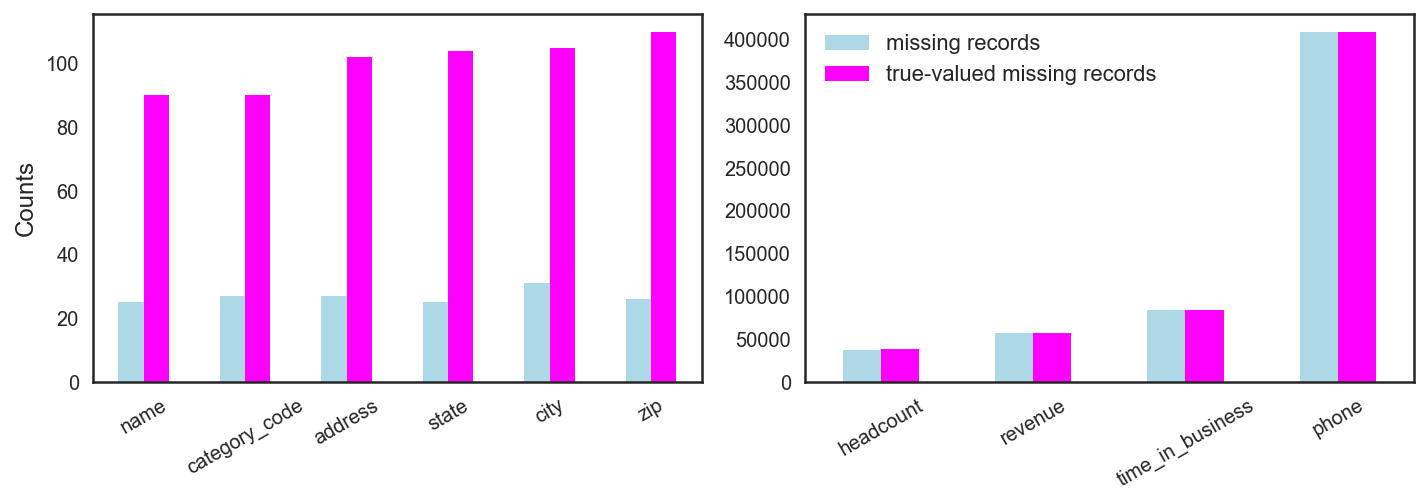

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(10,3.6))

ax1 = plt.subplot(121)
total_fill_df[:6].plot(kind ='bar', stacked=False, ax=ax1, color =['lightblue','magenta'])

plt.ylabel('Counts', fontsize = 12)
ax1.set_xticklabels( total_fill_df.field[:6], fontsize = 'medium', rotation = 30)
ax1.legend_.remove()

ax2 = plt.subplot(122)
total_fill_df[6:].plot(kind ='bar', stacked=False, ax=ax2, color =['lightblue','magenta'])
ax2.set_xticklabels( total_fill_df.field[6:], fontsize = 'medium', rotation = 30)
plt.legend(['missing records','true-valued missing records'], loc='best', fontsize =11)

plt.tight_layout()
plt.savefig('testplot.png', dpi=900)
plt.show()


In [284]:
df.head(2)

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
0,10085 SCRIPPS RANCH CT STE A,44420000,SAN DIEGO,50 to 99,AMD CUSTOM,3123628000,$20 to 50 Million,CA,10+ years,92131
1,2566 SHALLOWFORD RD NE STE 104 # 302,31490000,ATLANTA,1 to 4,Real Hope Real Estate Inc,None,"Less Than $500,000",GA,10+ years,30345


In [248]:
df.revenue.unique()

array([u'$20 to 50 Million', u'Less Than $500,000',
       u'$500,000 to $1 Million', u'$2.5 to 5 Million',
       u'$1 to 2.5 Million', None, u'$5 to 10 Million',
       u'$10 to 20 Million', u'$50 to 100 Million', u'$100 to 500 Million',
       u'Over $1 Billion', u'Over $500 Million', u'none', u'null', u'0', 0,
       u'', u' '], dtype=object)

In [262]:
df.time_in_business.unique()

array([u'10+ years', u'6-10 years', None, u'1-2 years', u'3-5 years',
       u'null', u'0', u'Less than a year', u' ', u'', u'none', 0], dtype=object)

In [255]:
Counter( df[df.revenue=='Less Than $500,000'].headcount )

Counter({None: 12265,
         0: 3,
         u'': 1,
         u' ': 8,
         u'0': 3,
         u'1 to 4': 118413,
         u'10 to 19': 49889,
         u'100 to 249': 12061,
         u'20 to 49': 40057,
         u'250 to 499': 3689,
         u'5 to 9': 69714,
         u'50 to 99': 20020,
         u'500 to 999': 1671,
         u'Over 1,000': 1826,
         u'none': 7,
         u'null': 8})

In [259]:
Counter( df[df.revenue=='Over $1 Billion'].headcount)

Counter({None: 55,
         u'1 to 4': 655,
         u'10 to 19': 239,
         u'100 to 249': 63,
         u'20 to 49': 245,
         u'250 to 499': 16,
         u'5 to 9': 389,
         u'50 to 99': 87,
         u'500 to 999': 9,
         u'Over 1,000': 11})